<a href="https://colab.research.google.com/github/bangwook1/test4class/blob/main/mid_term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid-term exam on Deep Learning for AI

- Name:  
- ID Number:  

------------------------------------------
Firstly, copy this notebook to your google drive.  
Secondly, click 'Runtime' tab, 'Change runtime type' tab, and change 'Hardware accelerator' as 'GPU.'  
Now you are ready to go, good luck! :)


In [2]:
import tensorflow as tf


## Q1 Mnist data

We will use Mnist dataset.

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


#### (Q1-1) [15 points] Check your data and design your neural network model
  - [5] Check dimension of inputs (train_images) and targets (train_labels) for training.
  - [5] Reshape the train_images and test_images data, the 2nd and 3rd dimension should be flattened. ( (28,28) dimension becomes 784 )
  - [5] Divide train_images and test_images by 255, so that the data ranges between 0 and 1.  

In [4]:
## Code here
train_images.shape
test_images.shape

(10000, 28, 28)

In [5]:


## Code here
train_labels.shape

(60000,)

In [6]:
# Code here

train_images =  train_images.reshape((60000, 28*28))    ## code for reshape
train_images =  train_images.astype("float32") / 255    ## code for normalize
test_images = test_images.reshape((10000, 28*28))      ## code for reshape
test_images = test_images.astype("float32") / 255      ## code for normalize

In [7]:
train_images.shape

(60000, 784)

#### (Q1-2) [10 points] Design a simple neural network model using three dense layers.
  - Two hidden dense layers have dimension of 50 and 30 with a relu activation.
  - Define final dense layer with the proper activation for multi-class outputs.
  - Build your model and check summary output. Summary output should look like below.
  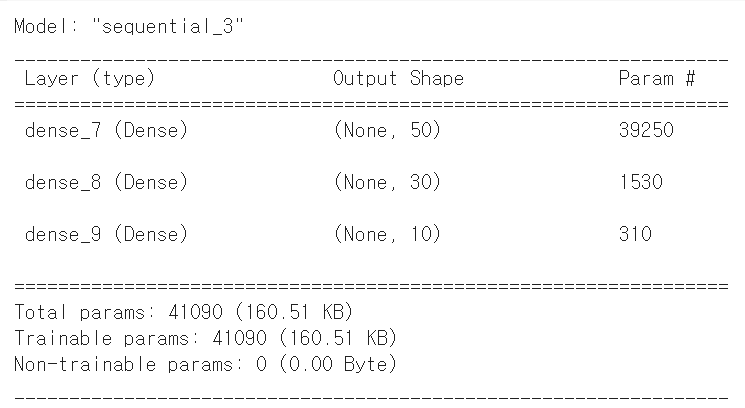

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
      layers.Dense(50, activation="relu"),
      layers.Dense(30, activation="relu"),
      layers.Dense(10, activation="softmax")
])

In [9]:
## Build your model and print summary output
model.build((None,784))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,090 (160.51 KB)

 Trainable params: 41,090 (160.51 KB)

 Non-trainable params: 0 (0.00 B)

#### (Q1-3) [10 points] Compile and fit your model.
 - [5] Set optimizer as 'SGD', Set proper loss and set evaluation metric as 'accuracy'
 - [5] Fit your model using 8 number of epochs with batch size 50. Specify validation data as (test_images, test, labels)

In [10]:

model.compile(  # Code here
              optimizer = "SGD",
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [11]:
history = model.fit(
                    train_images, train_labels,
                    epochs = 8,
                    batch_size = 50,
                    validation_data = (test_images, test_labels)
                    )


Epoch 1/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5819 - loss: 1.4229 - val_accuracy: 0.8882 - val_loss: 0.4049
Epoch 2/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8922 - loss: 0.3875 - val_accuracy: 0.9091 - val_loss: 0.3156
Epoch 3/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9126 - loss: 0.3085 - val_accuracy: 0.9182 - val_loss: 0.2779
Epoch 4/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9221 - loss: 0.2725 - val_accuracy: 0.9265 - val_loss: 0.2508
Epoch 5/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9292 - loss: 0.2490 - val_accuracy: 0.9314 - val_loss: 0.2376
Epoch 6/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9334 - loss: 0.2323 - val_accuracy: 0.9380 - val_loss: 0.2169
Epoch 7/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9377 - loss: 0.2131 - val_accuracy: 0.9424 - val_loss: 0.2031
Epoch 8/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9407 - loss: 0.2001 - val_accu

## Q2 Youtube reply data.

Let's create a spam detection model, a simple binary classification model! :)

It is a public set of comments collected for spam research. It has five datasets composed by 1,956 real messages extracted from five videos that were among the 10 most viewed on the collection period.


Here are some codes to download and prepare data.

In [12]:
!pip install ucimlrepo

In [13]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
youtube_spam_collection = fetch_ucirepo(id=380)

# data (as pandas dataframes)
X = youtube_spam_collection.data.features.copy()
y = youtube_spam_collection.data.targets.copy()


Codes for some preprocessing.

In [14]:
# Some preprocessing

import re
X.iloc[:,2] = X.iloc[:,2].apply(lambda x: re.sub(r'http\S+', ' http', x))    ## replace http something -> http
X.iloc[:,2] = X.iloc[:,2].apply(lambda x: re.sub(r'\S+.?\S+.\S[3]', ' http', x))    ## replace xxx.xxx.xxx -> http
X.iloc[:, 2] = X.iloc[:, 2].apply(lambda x: re.sub(r'(\\|%|\[|\]|!|\?|#|&)\S+', ' ---', x)) ## words starting with \, %, [, ], !, & or ? -> '---'
X.iloc[:,2] = X.iloc[:,2].apply(lambda x: x.lower())


Randomly shuffle data using pre-defined idx.

In [15]:
!gdown 1ne1COVEoKPOPBWQAbrL1NjTGzVJXWUFH

Downloading...
From: https://drive.google.com/uc?id=1ne1COVEoKPOPBWQAbrL1NjTGzVJXWUFH
To: /content/record1.pkl
100% 6.03M/6.03M [00:00<00:00, 173MB/s]


In [16]:
import numpy as np
import pickle

with open('record1.pkl', 'rb') as f:
  record1 = pickle.load(f)
  _, _, _, _, _, _, idx = record1

X_shuffled = X.iloc[idx, 2]
y_shuffled = y.iloc[idx]

Check first 10 sampels

In [17]:
## Targets

X_shuffled[:10]

,CONTENT
1778,stop wasting up your time and get paid to mes...
1936,love this song ---
1928,"hello everyone, it is not my intention to spam..."
1102,check out this funny video --- box knocks out...
1729,....i stil lisening this :)﻿
891,this is so http9;t i heard this before ---
1586,nice song﻿
406,"i love this song, it´s for empowering every wo..."
177,http
887,check out this video on youtube:﻿


In [18]:
## Labels, 0: normal, 1:spam

y_shuffled[:10]

,CLASS
1778,1
1936,0
1928,1
1102,1
1729,0
891,0
1586,0
406,0
177,1
887,1


In [19]:
## Count words so that we use most frequent words to use Bag of Words feature.

word_counts = {}
for row in X_shuffled:
    for word in row.split():
        word_counts[word] = word_counts.get(word, 0) + 1

sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

sorted_words = [word for word, count in sorted_word_counts.items() if count >= 10]


In [20]:
word_index = dict( [  (str1, i) for i, str1 in enumerate(sorted_words) ] )
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

Split data as train, validation and test sets

In [21]:
X_train = X_shuffled[:1000]
y_train = y_shuffled[:1000]

X_val = X_shuffled[1000:1500]
y_val = y_shuffled[1000:1500]

X_test = X_shuffled[1500:]
y_test = y_shuffled[1500:]

#### (Q2-1) [10 points] Make a vectorize_sequences function just like chapter 4.
 - `sorted_words` is a list of most frequent words used in the reply. `word_index` and `reverse_word_index` are index to word or word to index mapping information for the words.
 - Input is sequences like X_train, X_val and X_test.
 - Modify the code below.

Codes from chapter 4 is below for your referecne. You have to modify the below function. Be careful, this time input is words not integers. You have to modify accordingly.

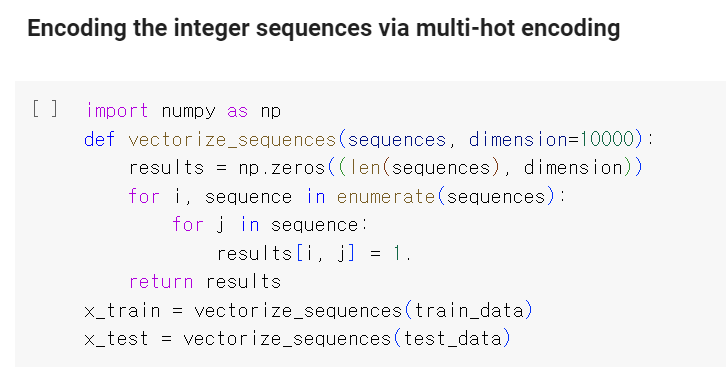

In [22]:
## Modify function below
#sorted_words is a list of most frequent words used in the reply. word_index and reverse_word_index are index to word or word to index mapping information for the words.
#Input is sequences like X_train, X_val and X_test.
#Modify the code below.

def vectorize_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            try :
              ### Hint!: Modify this part
              results[i, word_index[j]] = 1.
            except :
              pass
    return results

In [23]:
## get features using vectorize_sequences funtion that you defined

x4train = vectorize_sequences(X_train, dimension= len(sorted_words))
x4val = vectorize_sequences(X_val, dimension= len(sorted_words))
x4test = vectorize_sequences(X_test, dimension= len(sorted_words))

If you wrote the code correctly, the first output result of the training set will be same as below.

If there is something wrong, it may have all zeros.

In [24]:
x4train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#### (Q2-2) [10 points] Design a simple neural network model using four dense layers.
  - Try to use Functional API of keras, not sequential one.
  - Three hidden dense layers have dimension of 36, 20 and 10 with a relu activation.
  - Define final dense layer with the proper activation for binary classification output.
  - Model should look like below.

  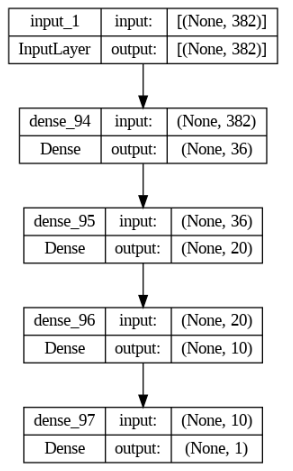


If you cannot solve problem Q2-1, run the code below to receive the preprocessed data and then solve the problem.

In [25]:
!gdown 1ne1COVEoKPOPBWQAbrL1NjTGzVJXWUFH

Downloading...
From: https://drive.google.com/uc?id=1ne1COVEoKPOPBWQAbrL1NjTGzVJXWUFH
To: /content/record1.pkl
100% 6.03M/6.03M [00:00<00:00, 280MB/s]


In [26]:
## Loading correct x4train, x4val, x4test, y_train, y_val, y_test datasets.

import pickle

with open('record1.pkl', 'rb') as f:
  record1 = pickle.load(f)
  x4train, x4val, x4test, y_train, y_val, y_test, idx = record1


In [27]:
## Define your model using Functional API

## your code here
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(36, activation="relu"),
    layers.Dense(20, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(1, activation="sigmoid")   #0~1    여기선 위의 값이 0,1이라서 2개의 클래스 sigmoid 사용
])

In [28]:

from tensorflow.keras.layers import Input, Dense

# Define the input layer
inputs = Input(shape=(len(word_index),))

# Define the hidden layers
dense1 = Dense(36, activation="relu")(inputs)
dense2 = Dense(20, activation="relu")(dense1)
dense3 = Dense(10, activation="relu")(dense2)

# Define the output layer
outputs = Dense(1, activation="sigmoid")(dense3)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)


#### (Q2-3) [15 points] Compile and fit your model.

 - [5] Set optimizer as 'rmsprop', Set proper loss and set evaluation metric as 'accuracy'
 - [5] Fit your model using 50 number of epochs with batch size 20. Specify validation data as (X4val, y_val)
 - [5] Evaluate your model using X4test and y_test. Report evaluation accuracy for test dataset.

In [29]:
model.compile( ## your code here
              optimizer = "rmsprop",
               loss = "binary_crossentropy",    #binary classification에서 사용
               metrics = ["accuracy"]
               )

In [30]:
history = model.fit(## your code here
                    x4train, y_train,   #X4val -> X4train, y_val -> y_train으로 학습데이터자리
                    epochs = 50,
                    batch_size = 20,
                    validation_data = (x4val, y_val)
                    )

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6030 - loss: 0.6833 - val_accuracy: 0.7140 - val_loss: 0.6565
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7208 - loss: 0.6478 - val_accuracy: 0.6820 - val_loss: 0.6239
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7256 - loss: 0.5985 - val_accuracy: 0.7360 - val_loss: 0.5789
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7282 - loss: 0.5576 - val_accuracy: 0.7240 - val_loss: 0.5670
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7557 - loss: 0.5366 - val_accuracy: 0.7460 - val_loss: 0.5354
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7471 - loss: 0.5203 - val_accuracy: 0.7500 - val_loss: 0.5294
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7502 - loss: 0.5037 - val_accuracy: 0.7420 - val_loss: 0.5276
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7409 - loss: 0.4963 - val_accuracy: 0.7420 - val_loss

In [31]:
## Evaluation code here (using X4test, y_test)
result = model.evaluate(x4test, y_test)
print(result)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8035 - loss: 0.4538
[0.46044889092445374, 0.7894737124443054]


You may want to check history. The results won't be exactly the same, but they will be similar.

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

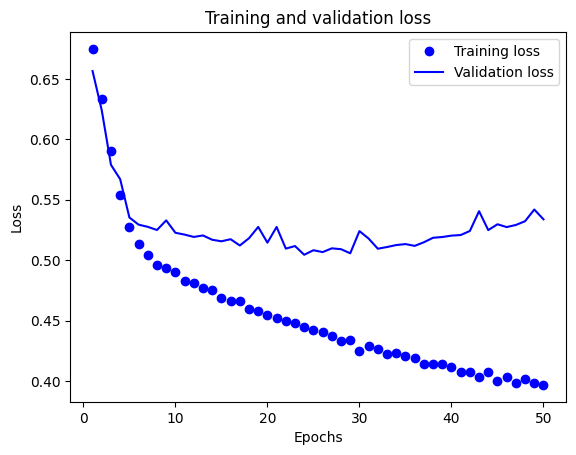

In [33]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

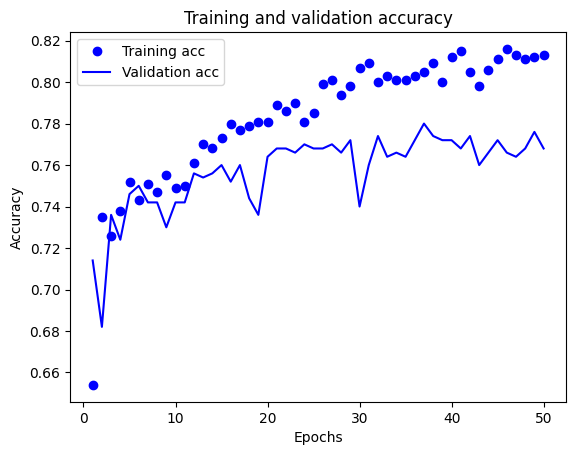

In [34]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### (Q2-3) [10 points] Revise your network and retrain using Callbacks.
 - [5] Try to use Dropout(0.5) layers after three hidden dense layers.
 - [5] Use Early Stopping callback with patience parameter 7 monitoring validation loss, and use ModelCheckpoint callbact to save the best model based on validation loss

In [35]:
## Your model code here
model = keras.Sequential([
    layers.Dense(36, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(20, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])


In [36]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=7, monitor='val_loss'),
    keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
]

model.compile(optimizer="rmsprop",
              loss= "binary_crossentropy" ,
              metrics=["accuracy"])

history = model.fit(x4train,
                    y_train,
                    epochs=50,
                    batch_size=20,
                    validation_data=(x4val, y_val),
                    callbacks=callbacks)

Epoch 1/50
48/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5103 - loss: 0.6918

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5105 - loss: 0.6919 - val_accuracy: 0.6220 - val_loss: 0.6906
Epoch 2/50
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5573 - loss: 0.6870

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5569 - loss: 0.6870 - val_accuracy: 0.6700 - val_loss: 0.6853
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5616 - loss: 0.6848

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5614 - loss: 0.6847 - val_accuracy: 0.6540 - val_loss: 0.6773
Epoch 4/50
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5796 - loss: 0.6779

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5796 - loss: 0.6778 - val_accuracy: 0.6620 - val_loss: 0.6672
Epoch 5/50
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5851 - loss: 0.6688

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5849 - loss: 0.6689 - val_accuracy: 0.6720 - val_loss: 0.6544
Epoch 6/50
48/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5825 - loss: 0.6594

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5832 - loss: 0.6594 - val_accuracy: 0.6900 - val_loss: 0.6390
Epoch 7/50
48/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6175 - loss: 0.6511

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6184 - loss: 0.6506 - val_accuracy: 0.6920 - val_loss: 0.6222
Epoch 8/50
44/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6397 - loss: 0.6364

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6431 - loss: 0.6345 - val_accuracy: 0.7340 - val_loss: 0.6041
Epoch 9/50
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6458 - loss: 0.6249

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6453 - loss: 0.6248 - val_accuracy: 0.7440 - val_loss: 0.5931
Epoch 10/50
45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - loss: 0.6094

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6842 - loss: 0.6101 - val_accuracy: 0.7420 - val_loss: 0.5810
Epoch 11/50
44/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6671 - loss: 0.6104

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6663 - loss: 0.6104 - val_accuracy: 0.7380 - val_loss: 0.5748
Epoch 12/50
48/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6641 - loss: 0.6105

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6642 - loss: 0.6098 - val_accuracy: 0.7360 - val_loss: 0.5661
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6761 - loss: 0.5858 - val_accuracy: 0.7360 - val_loss: 0.5697
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7087 - loss: 0.5891

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7085 - loss: 0.5892 - val_accuracy: 0.7380 - val_loss: 0.5596
Epoch 15/50
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6895 - loss: 0.5765

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6896 - loss: 0.5769 - val_accuracy: 0.7400 - val_loss: 0.5511
Epoch 16/50
40/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7069 - loss: 0.5739

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7059 - loss: 0.5739 - val_accuracy: 0.7320 - val_loss: 0.5479
Epoch 17/50
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7244 - loss: 0.5503

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7237 - loss: 0.5523 - val_accuracy: 0.7320 - val_loss: 0.5431
Epoch 18/50
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7183 - loss: 0.5824

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7190 - loss: 0.5814 - val_accuracy: 0.7340 - val_loss: 0.5424
Epoch 19/50
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6968 - loss: 0.5898

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6983 - loss: 0.5881 - val_accuracy: 0.7280 - val_loss: 0.5380
Epoch 20/50
48/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7444 - loss: 0.5446

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7436 - loss: 0.5457 - val_accuracy: 0.7420 - val_loss: 0.5351
Epoch 21/50
45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7469 - loss: 0.5612

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7456 - loss: 0.5611 - val_accuracy: 0.7620 - val_loss: 0.5330
Epoch 22/50
45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7399 - loss: 0.5298

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7377 - loss: 0.5311 - val_accuracy: 0.7480 - val_loss: 0.5284
Epoch 23/50
45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7491 - loss: 0.5541

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7465 - loss: 0.5545 - val_accuracy: 0.7540 - val_loss: 0.5274
Epoch 24/50
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7300 - loss: 0.5664

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7314 - loss: 0.5649 - val_accuracy: 0.7620 - val_loss: 0.5255
Epoch 25/50
41/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7475 - loss: 0.5397

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7456 - loss: 0.5402 - val_accuracy: 0.7600 - val_loss: 0.5219
Epoch 26/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7432 - loss: 0.5423 - val_accuracy: 0.7560 - val_loss: 0.5224
Epoch 27/50
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7485 - loss: 0.5231

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7474 - loss: 0.5248 - val_accuracy: 0.7460 - val_loss: 0.5215
Epoch 28/50
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7199 - loss: 0.5323

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7216 - loss: 0.5320 - val_accuracy: 0.7660 - val_loss: 0.5211
Epoch 29/50
48/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7428 - loss: 0.5425

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7433 - loss: 0.5420 - val_accuracy: 0.7640 - val_loss: 0.5177
Epoch 30/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7451 - loss: 0.5364 - val_accuracy: 0.7700 - val_loss: 0.5254
Epoch 31/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7412 - loss: 0.5918 - val_accuracy: 0.7640 - val_loss: 0.5179
Epoch 32/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7429 - loss: 0.5379 - val_accuracy: 0.7700 - val_loss: 0.5288
Epoch 33/50
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7601 - loss: 0.5319

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7601 - loss: 0.5316 - val_accuracy: 0.7740 - val_loss: 0.5144
Epoch 34/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7491 - loss: 0.5145 - val_accuracy: 0.7520 - val_loss: 0.5160
Epoch 35/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7740 - loss: 0.5324 - val_accuracy: 0.7700 - val_loss: 0.5175
Epoch 36/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7781 - loss: 0.5144 - val_accuracy: 0.7680 - val_loss: 0.5192
Epoch 37/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7712 - loss: 0.4665 - val_accuracy: 0.7580 - val_loss: 0.5192
Epoch 38/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7703 - loss: 0.5382 - val_accuracy: 0.7680 - val_loss: 0.5206
Epoch 39/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7550 - loss: 0.5212 - val_accuracy: 0.7720 - val_loss: 0.5202
Epoch 40/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7511 - loss: 0.4997 - val_accuracy: 0.7760 - val_loss: 0.5

You may want to check history. The results won't be exactly the same, but they will be similar.

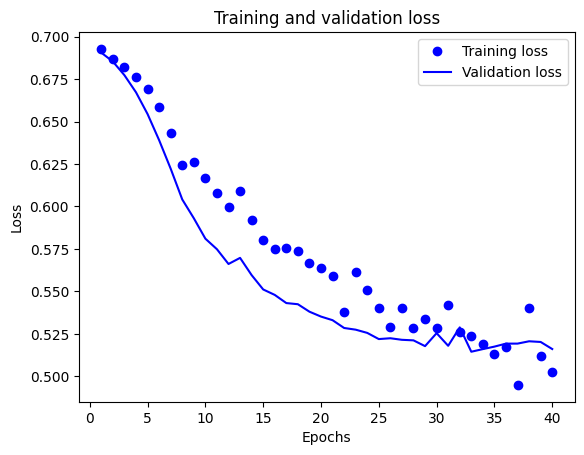

In [37]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

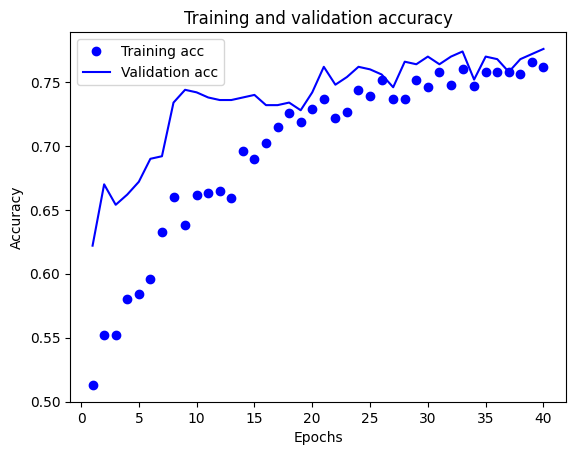

In [38]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### (Q2-4) [5 points] Load the saved best model and evaluate the model on test data.

In [39]:
best_model = keras.models.load_model('best_model.h5')
results = best_model.evaluate(x4test, y_test)
print(results)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8141 - loss: 0.4828
[0.49235934019088745, 0.8004385828971863]


#### (Q2-4) [10 points] Consider additional input feature, wold length feature. Make a multi-input model.
  - we can calculate wordlength feature using the code below
  - Using the multi-hot encoded reply_input feature(X4train, X4val, X4test) and chrlength feature (chrlength_train, chrlength_val, chrlength_test), try to make a multi-input model like below.

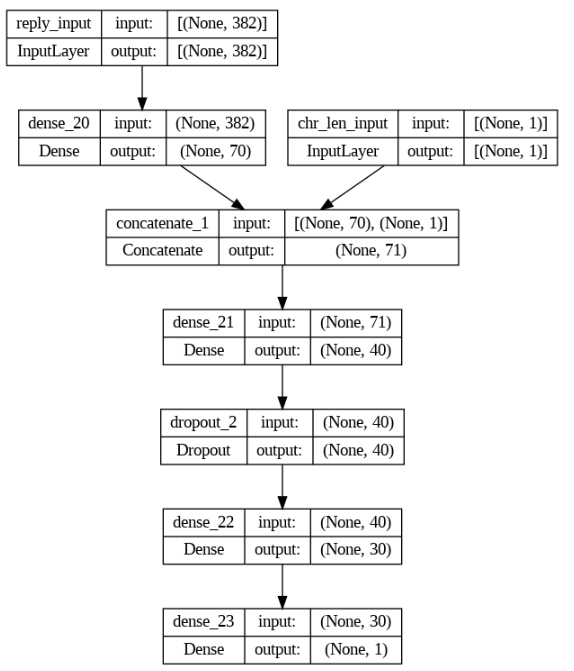

New chrlength feature is defined below. It is just a length of string normalized by maximum chrlength value.

In [40]:
X_ori = youtube_spam_collection.data.features.iloc[idx,2]
chrlength_text = np.array([ len(X_ori[i]) for i in range(len(X_ori)) ])
max_len = chrlength_text.max()

chrlength_train = chrlength_text[:1000]/max_len
chrlength_val = chrlength_text[1000:1500]/max_len
chrlength_test = chrlength_text[1500:]/max_len


In [44]:

reply_input = keras.Input(shape=(len(word_index),), name="reply_input")
word_len_input = keras.Input(shape=(1,), name="word_len_input")

dense1 = layers.Dense(70, activation="relu")(reply_input)

merged = layers.Concatenate()([dense1, word_len_input])

dense2 = layers.Dense(40, activation="relu")(merged)
dr1 = layers.Dropout(0.5)(dense2)

dense3 = layers.Dense(30, activation="relu")(dr1)
dr2 = layers.Dropout(0.5)(dense3)
output = layers.Dense(1, activation="sigmoid")(dense3)

model = keras.Model(inputs=[reply_input, word_len_input], outputs=[output])


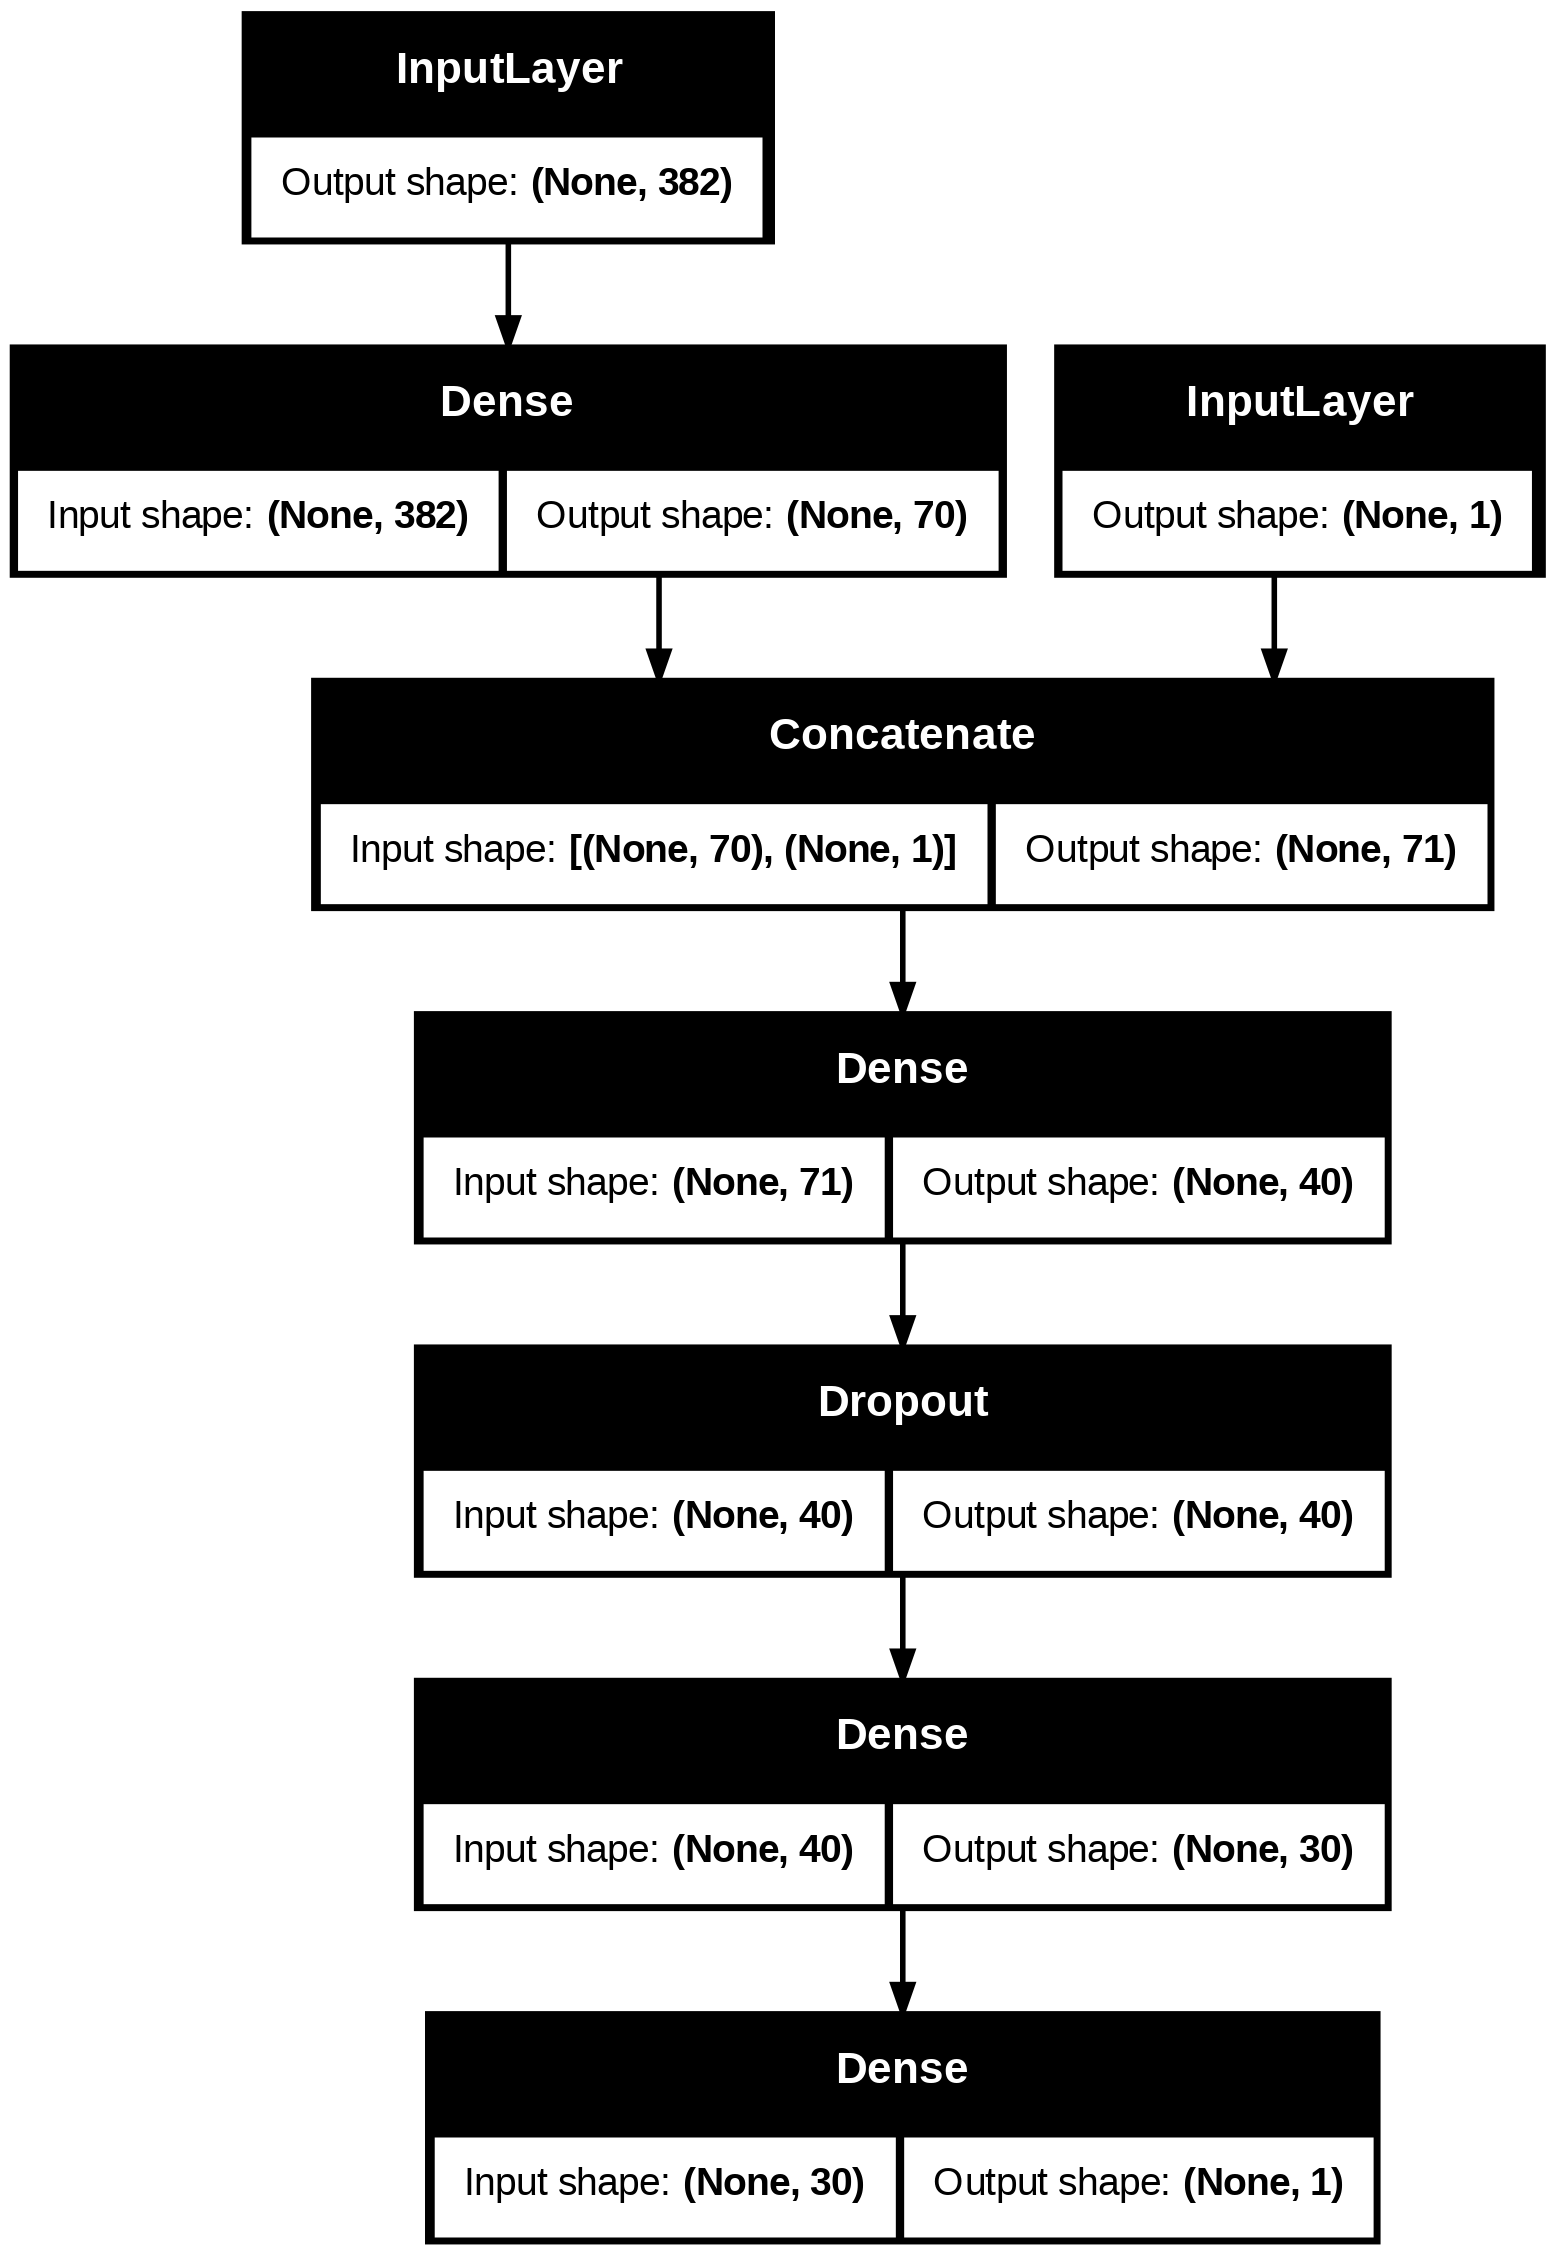

In [43]:
## If you define right, the result should look like below.
keras.utils.plot_model(model, "spam_classifier_with_shape_info.png", show_shapes=True)

#### (Q2-5) [5 points] Train and evaluate multi-input model
  - For compile, use RMSprop, specify metrics as accuracy. Use ModelCheckpoint callback saving a best model based on validation loss.
  - For training, train 100 number of epochs, using batch size 20. Use x4val, chrlength_val, and y_val for your validation data.
  - Finally, evaluate your model on test dataset.

In [49]:

callbacks = [
    keras.callbacks.EarlyStopping(patience=8, monitor='val_loss'),
    keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

]

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"]
              )
history = model.fit([x4val, chrlength_val], y_val,
                    epochs=100,
                    batch_size=20,
                    validation_data=([x4val, chrlength_val], y_val),
                    callbacks=callbacks
)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8485 - loss: 0.3170 - val_accuracy: 0.8680 - val_loss: 0.2620
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8411 - loss: 0.3090 - val_accuracy: 0.8660 - val_loss: 0.2658
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8517 - loss: 0.2941 - val_accuracy: 0.8680 - val_loss: 0.2610
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8319 - loss: 0.3024 - val_accuracy: 0.8720 - val_loss: 0.2622
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8653 - loss: 0.2659 - val_accuracy: 0.8620 - val_loss: 0.2720
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8663 - loss: 0.2919 - val_accuracy: 0.8720 - val_loss: 0.2587
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8627 - loss: 0.2972 - val_accuracy: 0.8680 - val_loss: 0.2591
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8488 - loss: 0.3000 - val_accuracy: 0.8720 

In [47]:
## Load the best model, and evaluate on test datasets.
best_model = keras.models.load_model('best_model.keras')
results = best_model.evaluate([x4test, chrlength_test], y_test)
## Your code here

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7896 - loss: 0.7077
